# Relatorio analise aluguel

In [1]:
import pandas as pd
dados = pd.read_csv("./dados/aluguel1.csv",sep=";")

In [2]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [3]:
dados.dtypes

Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

In [4]:
tipo_dados = pd.DataFrame(dados.dtypes,columns=["Tipos de Dados"])
tipo_dados.columns.name = "Variaveis"
tipo_dados

Variaveis,Tipos de Dados
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


In [5]:
dados.shape

(32960, 9)

In [6]:
print("A base de dados apresenta {} registros de imoveis, com {} variaveis".format(dados.shape[0],dados.shape[1]))

A base de dados apresenta 32960 registros de imoveis, com 9 variaveis


In [7]:
dados.describe()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,32960.000000,32960.000000,32960.000000,32960.000000,3.294300e+04,2.886700e+04,2.272300e+04
mean,1.771390,1.749059,0.665777,231.901547,1.295266e+04,2.388062e+03,2.364410e+03
std,1.717869,20.380402,1.176525,1135.254152,6.675220e+05,3.918496e+04,1.795641e+05
min,0.000000,0.000000,0.000000,0.000000,7.500000e+01,1.000000e+00,1.000000e+00
25%,0.000000,0.000000,0.000000,55.000000,1.500000e+03,5.900000e+02,1.100000e+02
50%,2.000000,1.000000,0.000000,87.000000,2.800000e+03,9.900000e+02,2.500000e+02
75%,3.000000,2.000000,1.000000,170.000000,6.500000e+03,1.800000e+03,6.970000e+02
max,100.000000,1966.000000,70.000000,90000.000000,1.200000e+08,6.552570e+06,2.705307e+07


## Exibir os tipos de imoveis

In [8]:
tipos_imoveis = dados["Tipo"]
tipos_imoveis

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [25]:
type(tipos_imoveis)

pandas.core.series.Series

In [10]:
tipos_imoveis.drop_duplicates(inplace=True)
#inplace to change the var tipo_imoveis. Default value is False

In [11]:
tipos_imoveis = pd.DataFrame(tipos_imoveis)
tipos_imoveis.index = range(tipos_imoveis.shape[0])
#tipos_imoveis.index = range(len(tipos_imoveis))
tipos_imoveis.columns.name = "Id"
tipos_imoveis

Id,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


# Imoveis residenciais

In [5]:
list(dados["Tipo"].drop_duplicates())

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

In [14]:
residencial = ['Quitinete','Casa','Apartamento','Casa de Condomínio','Casa de Vila']

In [7]:
residencial

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

In [15]:
selecao = dados["Tipo"].isin(residencial)
selecao

0         True
1         True
2        False
3         True
4         True
         ...  
32955     True
32956     True
32957     True
32958     True
32959    False
Name: Tipo, Length: 32960, dtype: bool

In [17]:
dados_residenciais = dados[selecao]
dados_residenciais

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [18]:
list(dados_residenciais["Tipo"].drop_duplicates())

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

In [19]:
dados_residenciais.shape

(22580, 9)

In [20]:
dados_residenciais.index = range(dados_residenciais.shape[0])
dados_residenciais

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [21]:
dados_residenciais.to_csv("./output/dados_residenciais.csv",sep=";",index=False)

In [23]:
dados_residenciais.describe()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,22580.000000,22580.000000,22580.000000,22580.000000,2.257100e+04,2.076500e+04,15795.000000
mean,2.509699,1.284677,0.941895,136.410053,4.985730e+03,1.642732e+03,798.890282
std,1.103543,13.093263,1.139380,145.370426,3.245147e+04,4.563660e+04,4485.679038
min,0.000000,0.000000,0.000000,10.000000,1.000000e+02,1.000000e+00,1.000000
25%,2.000000,0.000000,0.000000,64.000000,1.500000e+03,5.720000e+02,96.000000
50%,2.000000,1.000000,1.000000,90.000000,2.700000e+03,9.400000e+02,220.000000
75%,3.000000,2.000000,1.000000,150.000000,5.300000e+03,1.600000e+03,525.000000
max,32.000000,1960.000000,14.000000,3000.000000,4.500000e+06,6.552570e+06,450625.000000


TypeError: bar_label() missing 1 required positional argument: 'container'

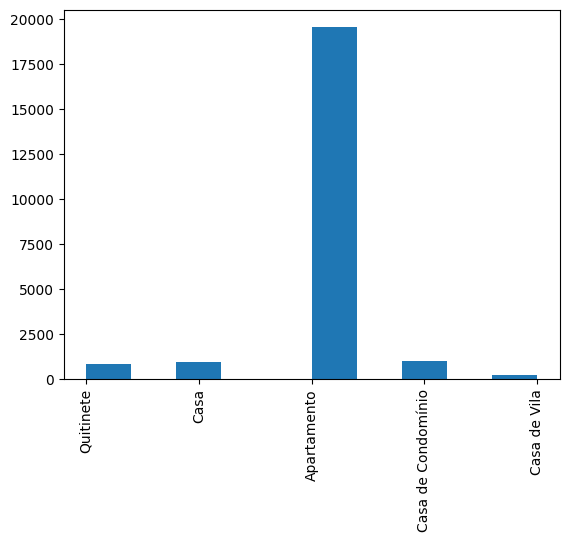

In [35]:
import matplotlib.pyplot as plt
dados_residenciais["Tipo"].hist(xrot=90, grid=False)